In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from k_means_custom import KMeansCustom

In [7]:
image_path="../output_videos/cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

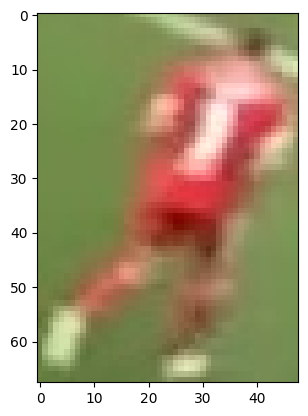

In [8]:
plt.imshow(image)
plt.show()

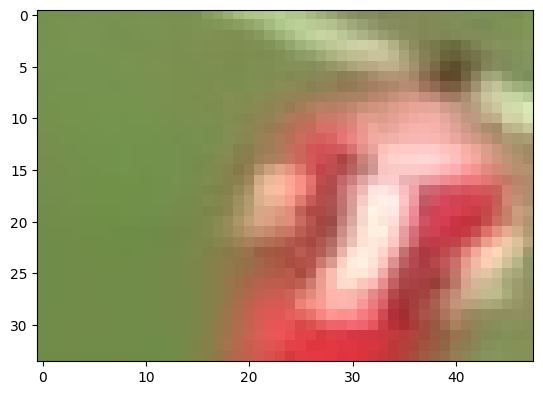

In [9]:
top_half_image=image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

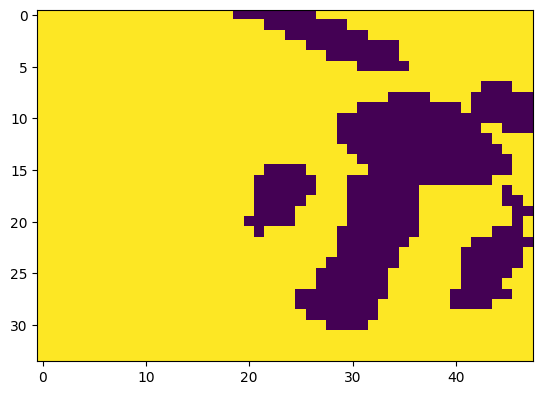

In [ ]:
# Reshape the image into a 2D array (n_samples, 3)
image_2d = top_half_image.reshape(-1, 3)

# Perform K-Means clustering with 2 clusters using the custom implementation
kmeans = KMeansCustom(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# Get the cluster labels
labels = kmeans.labels

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [19]:
# Extract corner clusters
corner_clusters = [
    clustered_image[0, 0],        # Top-left corner
    clustered_image[0, -1],       # Top-right corner
    clustered_image[-1, 0],       # Bottom-left corner
    clustered_image[-1, -1]       # Bottom-right corner
]

# Determine the most frequent cluster in the corners
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print("Non-player cluster:", non_player_cluster)

# Identify the player cluster as the other cluster
player_cluster = 1 - non_player_cluster
print("Player cluster:", player_cluster)


Non-player cluster: 1
Player cluster: 0


In [20]:
player_cluster_center = kmeans.centroids[player_cluster]